In [54]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import itertools

In [27]:
data_file.close()

In [3]:
data_file = h5py.File('SSH_model_v3.h5', 'a')

In [4]:
print(list(data_file.keys()))

['run-1']


In [6]:
group = data_file['run-1']
print(list(group.keys()))

['E_arr', 'E_vec_arr', 'v_arr']


In [ ]:
v_arr = np.array(data_file['run-1']['v_arr'][:])
print(v_arr)
print(np.shape(v_arr))

In [ ]:
E_arr = np.array(data_file['run-1']['E_arr'][:])
print(E_arr)
print(np.shape(E_arr))

In [ ]:
E_vec_arr = np.array(data_file['run-1']['E_vec_arr'][:])
print(E_vec_arr)
print(np.shape(E_vec_arr))

In [ ]:
N = 14

# print(v_arr)
# print(E_arr)
# print('--------')
# print(E_arr_T)

for i, v in enumerate(v_arr):
  print(f"{i} ---->> {v}")

E_arr_T = E_arr.transpose()

e_leb = 0
for e_arr in E_arr_T[:len(E_arr_T) - 1]:
  e_leb += 1
  plt.plot(v_arr,e_arr)


plt.title(f"(Many-electron system) Energy vs v for N: {N}")
plt.xlabel("v")
plt.ylabel("Energy")
plt.grid()
plt.show()

In [39]:
print(np.min(np.abs(E_arr[17])))
print(np.argmin(np.abs(E_arr[17])))
print(np.min(np.abs(E_arr[84])))
print(np.argmin(np.abs(E_arr[84])))

5.514118760081273e-18
1842
1.8311025325547657e-17
1837


In [41]:
e_vec_17 = E_vec_arr[17][np.argmin(np.abs(E_arr[17]))]
print(e_vec_17)
print("---------")
e_vec_84 = E_vec_arr[84][np.argmin(np.abs(E_arr[84]))]
print(e_vec_84)

[ 0.00020913 -0.03285407  0.00442126 ... -0.00779071  0.01687301
 -0.01702684]
---------
[ 0.02387722 -0.00377035 -0.01642159 ... -0.00501075  0.01095129
  0.01778782]


In [34]:
print(E_arr[17])
print(E_arr[84])

[-1366.76376958 -1283.68538099 -1148.22253347 ...  1165.30993051
  1282.86397846 16504.79715889]
[-3197.97969245 -3039.76934427 -2786.36231452 ...  2819.37246713
  3038.48650475 40599.61181931]


In [44]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

In [48]:
e_vec_17_normalized = normalize(e_vec_17)
e_vec_84_normalized = normalize(e_vec_84)
print(e_vec_17_normalized)
print(e_vec_84_normalized)
print(len(e_vec_17_normalized))
print(len(e_vec_84_normalized))
print(np.linalg.norm(e_vec_17_normalized))
print(np.linalg.norm(e_vec_84_normalized))

[ 0.00020913 -0.03285407  0.00442126 ... -0.00779071  0.01687301
 -0.01702684]
[ 0.02387722 -0.00377035 -0.01642159 ... -0.00501075  0.01095129
  0.01778782]
3432
3432
1.0
1.0


In [56]:
def basis_generator(N): # Checked OK

  basis = []

  for combination_indices in itertools.combinations(range(N), N // 2):
    state = [0] * N
    for index in combination_indices:
      state[index] = 1
    basis.append(state)
  
  return np.array(basis, dtype=np.float64)


def pos_sp_wf(N, v):
    basis = basis_generator(N)
    res = np.zeros(N)

    if len(basis) != len(v):
        print("error")

    for i in range(len(basis)):
        res += v[i] * basis[i]
    
    return res


In [57]:
N = 14

plt_wf_17 = pos_sp_wf(N, e_vec_17_normalized)
print(plt_wf_17)
print(len(plt_wf_17))
plt_wf_84 = pos_sp_wf(N, e_vec_84_normalized)
print(plt_wf_84)
print(len(plt_wf_84))

[-0.76882381 -0.66729614 -1.24144548 -0.62329331 -0.73977081 -0.75940163
  0.6023663  -0.64142414 -0.48176887 -0.30032058 -0.78074929 -0.24371302
 -1.81178056  0.40964437]
14
[-0.4791402  -0.2732171   0.49106562 -0.2238407   0.55750811 -0.88338245
  0.41319353 -1.41056686 -0.24719267  0.16233276 -0.69650145 -0.23975892
  0.65259952 -0.19103241]
14


In [58]:
plt_wf_17_normalized = normalize(plt_wf_17)
print(plt_wf_17_normalized)
plt_wf_84_normalized = normalize(plt_wf_84)
print(plt_wf_84_normalized)

[-0.25202741 -0.21874572 -0.40695707 -0.20432119 -0.24250357 -0.24893873
  0.19746113 -0.21026464 -0.1579282  -0.09844781 -0.25593669 -0.07989134
 -0.59391808  0.13428514]
[-0.21558595 -0.12293222  0.22095171 -0.10071564  0.25084708 -0.39747207
  0.18591368 -0.6346752  -0.1112227   0.07304055 -0.31338621 -0.10787793
  0.29363282 -0.08595377]


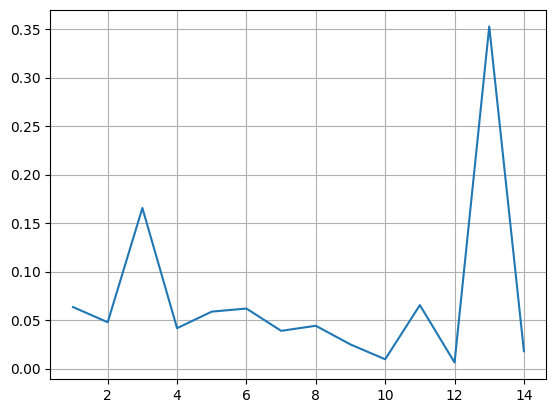

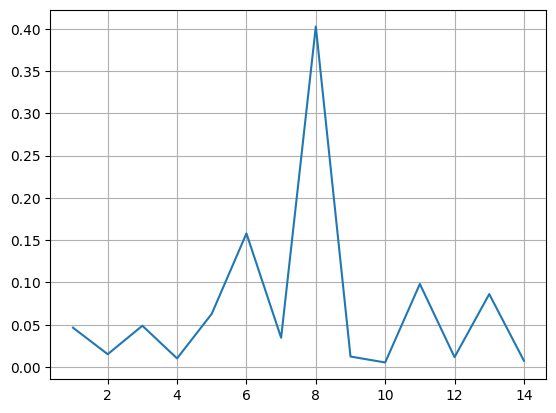

In [62]:
pos_arr = np.arange(1, N + 1)

plt.plot(pos_arr, plt_wf_17_normalized**2)
plt.grid()
plt.show()

plt.plot(pos_arr, plt_wf_84_normalized**2)
plt.grid()
plt.show()
